In [1]:
# initial setup
%run "../../../common/0_notebooks_base_setup.py"


/Users/csuarezgurruchaga/Desktop/Digital-House/CLASE_36/dsad_2021/common
default checking
Running command `conda list`... ok
jupyterlab=2.2.6 already installed
pandas=1.1.5 already installed
bokeh=2.2.3 already installed
seaborn=0.11.0 already installed
matplotlib=3.3.2 already installed
ipywidgets=7.5.1 already installed
pytest=6.2.1 already installed
chardet=4.0.0 already installed
psutil=5.7.2 already installed
scipy=1.5.2 already installed
statsmodels=0.12.1 already installed
scikit-learn=0.23.2 already installed
xlrd=2.0.1 already installed
Running command `conda install --yes nltk=3.5.0`... ok
Solving environment: ...working... done

# All requested packages already installed.


unidecode=1.1.1 already installed
pydotplus=2.0.2 already installed
pandas-datareader=0.9.0 already installed
flask=1.1.2 already installed


In [2]:
import pandas as pd
import numpy as np

<link rel="stylesheet" href="../../../common/dhds.css">
<div class="Table">
    <div class="Row">
        <div class="Cell grey left"> <img src="https://raw.githubusercontent.com/Digital-House-DATA/ds_blend_2021_img/master/M5/CLASE_36_Ensemble/M5_CLASE_36_portada.png" align="center" width="90%"/></div>
        <div class="Cell right">
            <div class="div-logo"><img src="https://raw.githubusercontent.com/Digital-House-DATA/ds_blend_2021_img/master/common/logo_DH.png" align="center" width=70% /></div>
            <div class="div-curso">DATA SCIENCE</div>
            <div class="div-modulo">MÓDULO 5</div>
            <div class="div-contenido">Modelos de Ensamble</div>
        </div>
    </div>
</div>

## Agenda

---

- Modelos de ensamble

- Modelos de ensamble para regresión

- Modelos de ensamble para clasificación



<div class="div-dhds-fondo-1"> Introducción
<img src="https://raw.githubusercontent.com/Digital-House-DATA/ds_blend_2021_img/master/M5/CLASE_36_Ensemble/M5_CLASE_36_separador.png" align="center" />

</div>

<img src ="https://raw.githubusercontent.com/Digital-House-DATA/ds_blend_2021_img/master/M5/CLASE_36_Ensemble/M5_CLASE_36_intro.png" align = "center" />

## Idea

Entrenar muchos modelos y hacerlos votar. La clasificación resultante es la que reciba más votos.

<img src="https://raw.githubusercontent.com/Digital-House-DATA/ds_blend_2021_img/master/M5/CLASE_36_Ensemble/M5_CLASE_36_ensamble_2.png" align="center" />


Si todos los modelos son muy parecidos, no van a agregar mucha información nueva en la votación. 

Necesitamos modelos diferentes entre sí, poco correlacionados. 

Los modelos pueden ser diferentes entre sí por una variedad de razones:

* Puede haber diferencia en la **población de datos**

* Puede haber una **técnica de modelado** utilizada diferente



<div class="div-dhds-fondo-1"> Ensambles
<img src="https://raw.githubusercontent.com/Digital-House-DATA/ds_blend_2021_img/master/M5/CLASE_36_Ensemble/M5_CLASE_36_separador.png" align="center" />

</div>

## ¿Qué es un modelo de ensamble?

---

**Los modelos de ensamble en aprendizaje automático combinan las decisiones de varios modelos para mejorar el rendimiento general**.

Las principales causas de error en los modelos de aprendizaje se deben al **ruido**, al **sesgo** y a la **varianza**.

**Los modelos de ensamble ayudan a minimizar estos factores**. 

Estos modelos están diseñados para mejorar la estabilidad y precisión de los algoritmos de aprendizaje automático.

Los modelos de ensamble emplean un grupo de modelos donde la combinación de sus resultados es casi siempre mejor en términos de precisión de predicción en comparación con el uso de un solo modelo.

**Los ensambles son una estrategia "divide and conquer" que se utiliza para mejorar la performance.**


## Técnicas de Ensamble

---

Los métodos de **Ensamble** son técnicas de **aprendizaje supervisado** donde se **combinan varios modelos base**.


Combinando varios modelos base se busca **ampliar el espacio de hipótesis** posibles para representar los datos, con el fin de **mejorar la precisión predictiva** del modelo combinado resultante.

Los ensambles suelen ser mucho más precisos que los modelos base que los componen.

<img src="https://raw.githubusercontent.com/Digital-House-DATA/ds_blend_2021_img/master/M5/CLASE_36_Ensemble/M5_CLASE_36_ensamble_1.jpg" align="center" />

Generalmente se distinguen dos familias de métodos de ensamble:

* Los métodos de **averaging (basados en promedios)**, que consisten en construir varios estimadores de forma independiente y luego hacer un **promedio** de sus predicciones. El modelo resultante de la combinación, suele ser mejor que cualquier estimador base separado.

    * Ejemplos de esta familia son los métodos de **Bagging**, y su implementación particular **Random Forest**.

* La otra familia de métodos de ensamble son los métodos de **boosting**, donde los estimadores base se construyen **secuencialmente** y uno trata de reducir el sesgo del estimador combinado, centrándose en aquellos casos en los que se observa una peor performance. La idea es combinar varios modelos débiles para producir un ensamble potente.

    * Ejemplos de esta familia son **AdaBoost** y **Gradient Tree Boosting**.
    
**(Veremos bagging y boosting en detalle en las próximas clases.)**

## El espacio de Hipótesis

---

En cualquier tarea de **aprendizaje supervisado**, nuestro objetivo es hacer predicciones de la verdadera función de clasificación $f$ aprendiendo el clasificador $h$. 

En otras palabras, buscamos en un cierto **espacio de hipótesis H** la función más apropiada para describir la relación entre nuestras features y el objetivo.

Puede haber varias **razones por las cuales un clasificador base no pueda lograr mayor exactitud al tratar de aproximar la función de clasificación real**.

Estos son tres de los posibles problemas:

* Estadísticos

* Computacionales

* De representación



### El problema estadístico

---

<table><tr>
    <td style=" font-size:18px;">

<p>
Si la cantidad de datos de entrenamiento disponibles es <b>pequeña</b>, el clasificador base tendrá dificultades para converger a  $f$.
</p>
<p>        
Un clasificador de ensamble puede mitigar este problema <b>"promediando"</b> las predicciones de los clasificadores base para mejorar la convergencia.
</p>
<p>        
Esto puede representarse gráficamente como una búsqueda en un espacio en el que múltiples aproximaciones parciales son promediadas para obtener una mejor aproximación al objetivo.
</p>
<p>        
La función real $f$ es mejor aproximada como un promedio de los clasificadores base $h_i$.
</p>    
        </td>
        <td style="width:40%;">

<img src="https://raw.githubusercontent.com/Digital-House-DATA/ds_blend_2021_img/master/M5/CLASE_36_Ensemble/M5_CLASE_36_problema_estadistico.png" align = "center" />
        </td>
    </tr>
</table>    

### El problema computacional

---

<table><tr>
    <td style=" font-size:18px;">

<p>Incluso con suficientes datos de entrenamiento, puede ser computacionalmente difícil encontrar el mejor clasificador $h$.</p>

<p>Por ejemplo, si nuestro clasificador base es un árbol de decisión, una búsqueda exhaustiva del espacio de hipótesis de todos los posibles clasificadores es un problema extremadamente complejo (NP-completo). Por ésta razón usamos un <b>algoritmo voraz</b>.</p>

<p>Un conjunto compuesto por varios clasificadores base con <b>diferentes puntos de partida</b> puede proporcionar una mejor aproximación de $f$ que cualquier clasificador base individualmente. La verdadera función $f$ es usualmente mejor aproximada usando varios puntos de partida para explorar el espacio de hipótesis H.</p>
</td>
<td style="width:40%;">
<img src="https://raw.githubusercontent.com/Digital-House-DATA/ds_blend_2021_img/master/M5/CLASE_36_Ensemble/M5_CLASE_36_problema_computacional.png" align = "center" />
</td></tr>
</table>    


### El problema de representación

---

<table><tr>
    <td style=" font-size:18px;">


<p>A veces $f$ no se puede expresar en términos de la hipótesis.</p>

<p>Por ejemplo, si usamos un árbol de decisión como clasificador base, este trabaja formando <b>particiones rectilíneas</b> del espacio de features.</p>

<p>Pero si $f$ es una línea diagonal, entonces no puede ser representada por un número finito de segmentos rectilíneos.</p>

<p>Por lo tanto, el límite de decisión verdadero, no puede ser expresado por un árbol de decisión.</p>

<p>Sin embargo, todavía puede ser posible aproximar $f$, e incluso expandir el espacio de funciones representables, usando métodos de ensamble.</p>

</td>
<td style="width:40%;">
    
<img src="https://raw.githubusercontent.com/Digital-House-DATA/ds_blend_2021_img/master/M5/CLASE_36_Ensemble/M5_CLASE_36_problema_representacion.png" align = "center" />

</td></tr>
</table>    


## Condición necesaria y suficiente

---

La condición necesaria y suficiente que se debe cumplir para que un clasificador de ensamble mejore los resultados de cualquiera de sus clasificadores base es que estos sean precisos y diversos.

* **Capacidad predictiva**: los clasificadores base deben hacer mejores predicciones que la totalmente aleatoria. (Su AUC debe ser mayor a 0.5)

* **Diversidad**: los clasificadores base deben cometer distintos errores ante los mismos casos. (Sin diversidad no se puede mejorar la precisión del ensamble al combinar los clasificadores base)

Imaginemos que tenemos un ensamble de tres clasificadores base $\{ h_1, h_2, h_3 \}$ y consideramos un caso nuevo x:

* Si los tres clasificadores son similares, cuando $h_1(x)$ sea erróneo probablemente $h_2(x)$ y $h_3(x)$ también lo serán y no ganaremos nada al combinarlos. 

* Pero si son bastante diversos, los errores que cometan estarán poco correlacionados, y cuando $h_1(x)$ sea erróneo posiblemente $h_2(x)$ y $h_3(x)$ sean correctos y el voto mayoritario será correcto. Esto es cierto, siempre y cuando, el error rate individual de cada uno sea menor al 50%


## Ejemplo

---

Vamos a usar el dataset Hitters (que ya usamos en CART) para entrenar un modelo de ensamble para predecir el valor del `log(Salary)`

El ensamble va a estar compuesto por

* Un modelo de regresión lineal múltiple

* Un modelo de regresión de Lasso

* Un árbol de regresión

Vamos a calcular la predicción para cada instancia como el promedio de las predicciones de cada uno de estos tres modelos.

In [3]:
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn import tree

Leemos los datos y, para simplificar, nos quedamos sólo con los registros completos y las features numéricas.

In [4]:
data_raw = pd.read_csv("../Data/Hitters.csv")
print(data_raw.shape)
data_complete = data_raw.dropna()
print(data_complete.shape)

data_columns = ['AtBat', 'Hits', 'HmRun', 'Runs', 'RBI', 
                'Walks', 'Years', 'CAtBat', 'CHits', 'CHmRun', 
                'CRuns', 'CRBI', 'CWalks', 'PutOuts', 'Assists', 
                'Errors', 'Salary']

data = data_complete.loc[:, data_columns]
print(data.shape)

data.head()

(322, 20)
(263, 20)
(263, 17)


,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors,Salary
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,632,43,10,475.0
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,880,82,14,480.0
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,200,11,3,500.0
4,321,87,10,39,42,30,2,396,101,12,48,46,33,805,40,4,91.5
5,594,169,4,74,51,35,11,4408,1133,19,501,336,194,282,421,25,750.0


Creamos los conjuntos de train y test


In [5]:
X = data.drop("Salary", axis = 1)
print(X.shape)

y = np.log(data.Salary)
print(y.shape)

X_train, X_test, y_train, y_test = train_test_split(X, y,random_state = 127)


(263, 16)
(263,)


Estandarizamos las features

In [6]:
scaler = StandardScaler()
X_train_scl = scaler.fit_transform(X_train)

X_test_scl = scaler.transform(X_test)

Entrenamos el modelo de regresión lineal

In [7]:
model_1 = LinearRegression()
fit_1 = model_1.fit(X_train_scl, y_train)

Evaluamos la performance en test mediante en error cuadrático medio

In [8]:
predict_1 = fit_1.predict(X_test_scl)
performance_1 = mean_squared_error(y_test, predict_1)
performance_1

0.4143578671210905

Entrenamos el modelo de Lasso

In [9]:
model_2 = Lasso(alpha = 0.05)
fit_2 = model_2.fit(X_train_scl, y_train)

Evaluamos la performance en test mediante en error cuadrático medio

In [10]:
predict_2 = fit_2.predict(X_test_scl)
performance_2 = mean_squared_error(y_test, predict_2)
performance_2

0.34796852768473413

Entrenamos el árbol de regresión

In [11]:
model_3 = tree.DecisionTreeRegressor(random_state = 271)
fit_3 = model_3.fit(X_train_scl, y_train);

Evaluamos la performance en test mediante en error cuadrático medio

In [12]:
predict_3 = fit_3.predict(X_test_scl)
performance_3 = mean_squared_error(y_test, predict_3)
performance_3

0.4892029369647645

Construimos el ensamble de los tres modelos

In [13]:
def predict_ensamble(X, model_1, model_2, model_3):
    y_pred_1 = model_1.predict(X)
    y_pred_2 = model_2.predict(X)
    y_pred_3 = model_3.predict(X)
    result = (y_pred_1 + y_pred_2 + y_pred_3) / 3
    return result
    

Evaluamos la performance en test mediante en error cuadrático medio

In [14]:
y_pred_ensemble = predict_ensamble(X_test_scl, fit_1, fit_2, fit_3)
performance_ensemble =  mean_squared_error(y_test, y_pred_ensemble)
performance_ensemble

0.3208398143673834

Observemos que el error cuadrático medio del modelo de ensamble es el menor obtenido.

<div class="div-dhds-fondo-1"> Conclusiones
<img src="https://raw.githubusercontent.com/Digital-House-DATA/ds_blend_2021_img/master/M5/CLASE_36_Ensemble/M5_CLASE_36_separador.png" align="center" />
</div>

## Conclusiones

---

* Los modelos de Ensamble generalmente presentan menos overfitting y mejor performance.

* Los métodos de Ensamble mejoran el rendimiento de los modelos base individuales gracias a su mayor capacidad para aproximar la función de predicción real en un problema de aprendizaje supervisado.

* Los métodos de Ensamble se desempeñan mejor en escenarios más complejos, pero pueden resultar en modelos muy complicados y difíciles de interpretar.




<div class="div-dhds-fondo-1"> Hands-on
<img src="https://raw.githubusercontent.com/Digital-House-DATA/ds_blend_2021_img/master/M5/CLASE_36_Ensemble/M5_CLASE_36_separador.png" align="center" />
</div>

## Ejercicio

Vamos a usar el dataset Hitters para entrenar un modelo de ensamble para clasificar el valor de `Salary` en alto o bajo.

El ensamble va a estar compuesto por

* Un modelo de clasificación Naive Bayes (Gaussian)

* Un modelo de regresión logística con regularización

* Un árbol de clasificación

Vamos a calcular la predicción para cada instancia como el promedio de las probabilidades resultado de cada uno de estos tres modelos.



1. Leer los datos y, para simplificar, conservar sólo los registros completos y las features numéricas.

2. Crear una variable categórica, a partir de `Salary`, de valores alto / bajo representados como 1 / 0, usando como umbral un valor de Salary igual a 600

3. Crear los conjuntos de train y test

4. Estandarizar las features

5. Entrenar cada uno de los modelos base del ensamble y evaluar con AUC la performance de cada uno de los modelos base

6. Escribir una función que devuelva la predicción del ensamble, y comparar la performance obtenida en test con las obtenidas con los modelos base


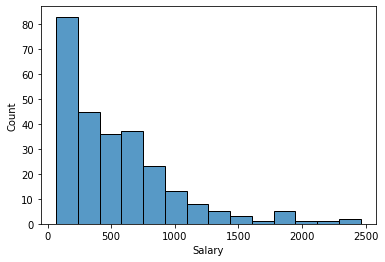

In [31]:
import seaborn as sns
%matplotlib inline

sns.histplot(data.Salary);



In [32]:
threshold = 600
mask = data.Salary < threshold
print(sum(mask))
mask = data.Salary >= threshold
print(sum(mask))

166
97


## Solución

---



In [33]:
import pandas as pd
from sklearn.preprocessing import binarize
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_auc_score
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn import tree

1. 

In [34]:
data_raw = pd.read_csv("../Data/Hitters.csv")
print(data_raw.shape)
data_complete = data_raw.dropna()
print(data_complete.shape)

data_columns = ['AtBat', 'Hits', 'HmRun', 'Runs', 'RBI', 
                'Walks', 'Years', 'CAtBat', 'CHits', 'CHmRun', 
                'CRuns', 'CRBI', 'CWalks', 'PutOuts', 'Assists', 
                'Errors', 'Salary']

data = data_complete.loc[:, data_columns]
print(data.shape)

data.head()

(322, 20)
(263, 20)
(263, 17)


,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors,Salary
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,632,43,10,475.0
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,880,82,14,480.0
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,200,11,3,500.0
4,321,87,10,39,42,30,2,396,101,12,48,46,33,805,40,4,91.5
5,594,169,4,74,51,35,11,4408,1133,19,501,336,194,282,421,25,750.0


2.

In [35]:
salary_cat = binarize(pd.DataFrame(data.Salary), threshold = 600)


3.

In [36]:
X = data.drop("Salary", axis = 1)
print(X.shape)

y = salary_cat
print(y.shape)

X_train, X_test, y_train, y_test = train_test_split(X, y,random_state = 127)


(263, 16)
(263, 1)


4. 

In [37]:
scaler = StandardScaler()
X_train_scl = scaler.fit_transform(X_train)

X_test_scl = scaler.transform(X_test)

5.

Entrenamos el modelo de Naive Bayes

In [38]:
model_1 = GaussianNB()
y_train_nb = y_train.reshape(y_train.shape[0], )
fit_1 = model_1.fit(X_train_scl, y_train_nb)

Evaluamos la performance en test usando AUC

In [39]:
predict_1 = fit_1.predict_proba(X_test_scl)
predict_1_class_1 = predict_1[:, 1]
performance_1 = roc_auc_score(y_test, predict_1_class_1)
performance_1

0.9009100101112235

Entrenamos el modelo de regresión logística con regularización

In [40]:
model_2 = LogisticRegression(solver = "saga", penalty="elasticnet", l1_ratio = 0.5, C = 0.1)
y_train_lr = y_train.reshape(y_train.shape[0], )
fit_2 = model_2.fit(X_train_scl, y_train_lr);

Evaluamos la performance en test usando AUC

In [41]:
predict_2 = fit_2.predict_proba(X_test_scl)
predict_2_class_1 = predict_2[:, 1]
performance_2 = roc_auc_score(y_test, predict_2_class_1)
performance_2

0.8938321536905965

Entrenamos el árbol de clasificación

In [42]:
model_3 = tree.DecisionTreeClassifier(criterion='entropy')
fit_3 = model_3.fit(X_train_scl, y_train)

Evaluamos la performance en test usando AUC

In [43]:
predict_3 = fit_3.predict_proba(X_test_scl)
predict_3_class_1 = predict_3[:, 1]
performance_3 = roc_auc_score(y_test, predict_3_class_1)
performance_3

0.7431749241658241

6.

In [44]:
def predict_proba_ensamble(X, model_1, model_2, model_3):
    y_pred_1 = model_1.predict_proba(X)[:, 1]
    y_pred_2 = model_2.predict_proba(X)[:, 1]
    y_pred_3 = model_3.predict_proba(X)[:, 1]
    result = (y_pred_1 + y_pred_2 + y_pred_3) / 3
    return result
    

Observación: 
    
Para calcular AUC necesitamos las probabilidades de pertenecer a una de las clases, por eso usamos predict_proba. 

Si empleáramos accuracy como medida de performance, podríamos usar predict en lugar de predict_proba para obtener los valores predichos, y la moda en lugar del promedio para calcular la predicción del ensamble.

Evaluamos la performance en test usando AUC

In [45]:
y_pred_ensemble = predict_proba_ensamble(X_test_scl, model_1, model_2, model_3)
performance_ensemble =  roc_auc_score(y_test, y_pred_ensemble)
performance_ensemble

0.9039433771486349

Observemos que el valor de AUC del modelo de ensamble es el mejor obtenido.

<div class="div-dhds-fondo-1"> Referencias
<img src="https://raw.githubusercontent.com/Digital-House-DATA/ds_blend_2021_img/master/M5/CLASE_36_Ensemble/M5_CLASE_36_separador.png" align="center" />
</div>

<a href="https://www.youtube.com/watch?v=Un9zObFjBH0" target="_blank">Ensemble learners</a>

<a href="https://towardsdatascience.com/simple-guide-for-ensemble-learning-methods-d87cc68705a2" target="_blank">Simple guide for ensemble learning methods</a>

<a href="https://juhiramzai.medium.com/holy-grail-for-bias-variance-tradeoff-overfitting-underfitting-7fad64ab5d76" target="_blank">Holy Grail for Bias-Variance tradeoff, Overfitting & Underfitting</a>

<a href="https://www.kaggle.com/mathchi/hitters-baseball-data" target="_blank">Dataset Hitters</a>